In [1]:
#Let's load all the necessary Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Let's load the data
data1 = pd.read_csv('foodhub_order.csv')

In [3]:
data1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
data1.shape   #Let's get information about the columns and rows in the data

(1898, 9)


Observations#1: The data has 9 columns, and 1898 rows which all correspond to a specific order ID.


In [5]:
data1.info()  #Information about the columns and the data they contain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [6]:
data1.isnull().sum()  #Checking if there is any missing data

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Observation#2: the data type of the columns in the dataset goes as follow.
order_id has intergers data type
customer_id has intergers data type
restaurant_name has objects data type
cusine_type has object data type
cost_of_the_order has float data type
day_of_the_week has object data type
rating has object data type
food_preparation_time has has interger data type
delivery_time has interger data type
 in total there is one column that has float data type, four columns have interger data type, and four columns have object data type.
     The dataset does not have any missing data, therefore we will not be dropping any data.

In [7]:
#Now let's turn the columns that have object has data type into category

In [8]:
data1['restaurant_name'] = data1.restaurant_name.astype('category')
data1['day_of_the_week'] = data1.day_of_the_week.astype('category')
data1['rating'] = data1.rating.astype('category')

In [9]:
data1['cuisine_type'] = data1.cuisine_type.astype('category')

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(4), float64(1), int64(4)
memory usage: 90.0 KB


Observation#3: Now we have converted all the object data type into category data type to reduce memory usage in the computer. This has reduced the memory usage by apromaxitively 43.6 KB

In [11]:
data1.describe() #The statistical information about the data

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


Observation#4: The minimum time it takes for food to be prepared once an order is placed is 20.000000
The average time for food to be prepared is 27.371970
the maximum time for food to be prepared is 35.000000

In [12]:
#Finding how many orders have not been rated

In [13]:
data1.describe(exclude= 'number')

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


In [14]:
data1['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

Observation#5: In the dataset there are 736 orders that have not been rated.

Rating

In [15]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,  #specifying the number of rows of the subplot
                                           sharex=True, #Sharing the X-axiz for all subplots
                                           gridspec_kw={'height_ratios': (0.25, 0.75)}, 
                                           figsize=figsize)
    #Now let's create the 2 subplots
    sns.boxplot(data=data,
                x=feature, 
                ax=ax_box2, 
                showmeans=True, 
                color="violet") 
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette= 'winter')
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist2.axvline(data[feature].median(), color= 'black', linestyle='-')

In [16]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # lets get the lenght of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
#Univariate analysis for Cost of the order

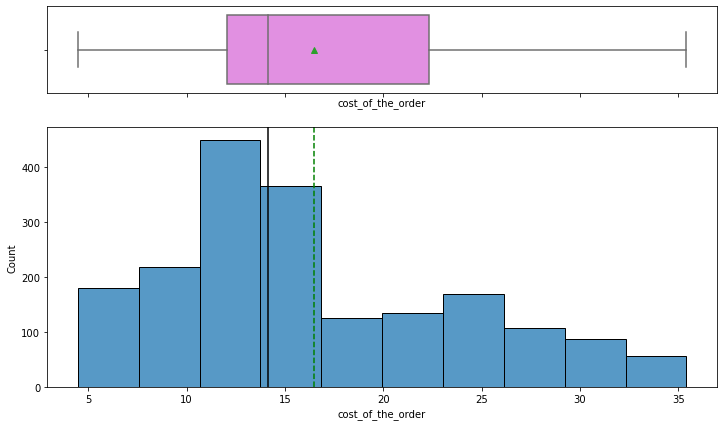

In [18]:
histogram_boxplot(data1, 'cost_of_the_order',bins=10)

Observation#6.1: Cost of the oders in the data is slightly right skewed, most of the orders bought cost less than 20 dollars.

In [19]:
#univariate analysis for day of the week

In [20]:
data1['day_of_the_week'].unique()

['Weekend', 'Weekday']
Categories (2, object): ['Weekend', 'Weekday']

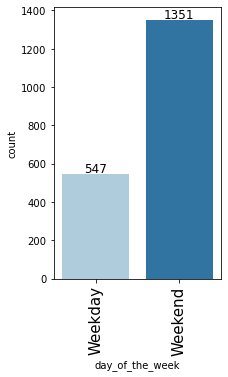

In [21]:
labeled_barplot(data1, 'day_of_the_week')

Observation#6.2: Most of the orders are placed on the weekend, there are 1351 ordes placed on the weekend compared to 547 orders on weekdays.

In [22]:
#univariate analysis for cuisine type

In [23]:
data1['cuisine_type'].unique()

['Korean', 'Japanese', 'Mexican', 'American', 'Indian', ..., 'Thai', 'Southern', 'French', 'Spanish', 'Vietnamese']
Length: 14
Categories (14, object): ['Korean', 'Japanese', 'Mexican', 'American', ..., 'Southern', 'French', 'Spanish', 'Vietnamese']

In [24]:
pd.DataFrame.from_records([(col, data1[col].nunique()) for col in data1.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

,Column_Name,Num_Unique
5,day_of_the_week,2
6,rating,4
3,cuisine_type,14
7,food_preparation_time,16
8,delivery_time,19
2,restaurant_name,178
4,cost_of_the_order,312
1,customer_id,1200
0,order_id,1898


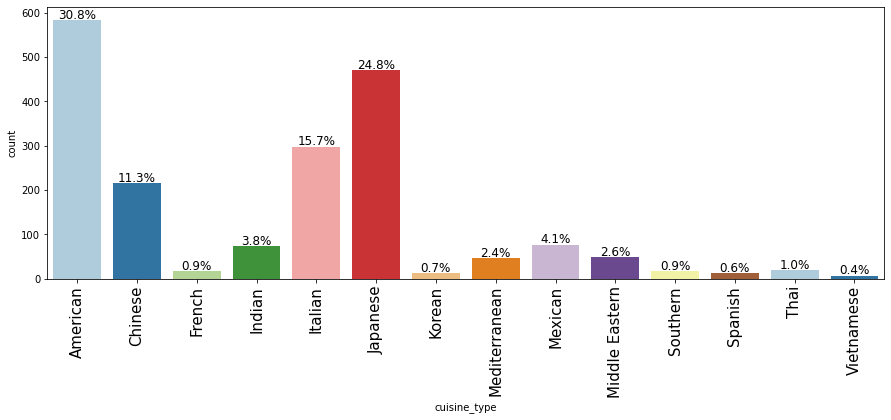

In [25]:
labeled_barplot(data1, 'cuisine_type', perc=True)

Observation#6.3: American food is the most ordered cusine type, and vietnamese cusine type is the least ordered cusine type.

In [26]:
#Univariate analysis for rating

In [27]:
data1['rating'].unique()

['Not given', '5', '3', '4']
Categories (4, object): ['Not given', '5', '3', '4']

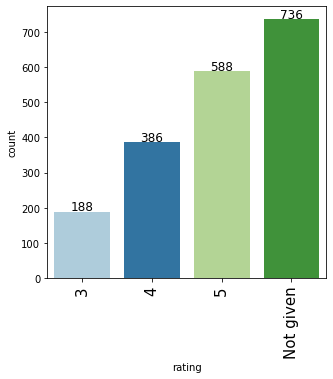

In [28]:
labeled_barplot(data1, "rating")

Observation#6.4: There have been 736 non rated ordered out of 1898 orders. There are 588 orders that have 5 as rating. There are 386 orders that have 4 as rating. and 188 orders that have 3 as their rating.

In [29]:
#Univariate Analysis for food preparation time

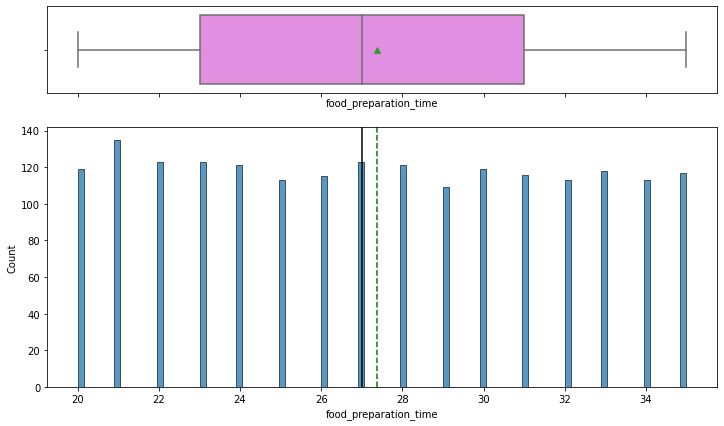

In [30]:
histogram_boxplot(data1, "food_preparation_time", bins=100)

Observation#6.5: The food preparation time is slightly normally distribuated. no skewness could be observed.

In [31]:
#Univariate analysis for delivery time

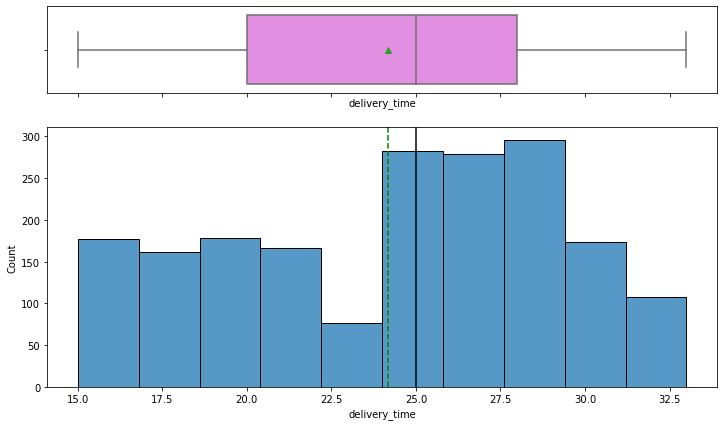

In [32]:
histogram_boxplot(data1, "delivery_time", bins=10)

Observation#6.6: The delivery time data is left skewed, most restaurants take more than average to deliver to the customers.

In [33]:
#Let's find the top 5 restaurants in term of number of orders received

In [34]:
data1["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

Observations#7: the top5 restaurants are 
Shake Shack                  
The Meatball Shop            
Blue Ribbon Sushi            
Blue Ribbon Fried Chicken     
Parm                          

In [35]:
#Lets find the most popular cusine type during the weekend

In [36]:
data1_weekend = data1[data1['day_of_the_week'] == 'Weekend']

In [37]:
data1_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

 Obeservation#8: American cuisine type is the most popular on weekends. with 415 orders in the weekend.

In [38]:
#Let's find the percentage of order that are more than 20 dollars

In [39]:
data1_greater_than_20 = data1[data1['cost_of_the_order']>20]
print('the number of total orders that cost above 20 dollars is:', data1_greater_than_20.shape[0])

the number of total orders that cost above 20 dollars is: 555


In [40]:
percentage = (data1_greater_than_20.shape[0] / data1.shape[0])*100
print('percentage of orders above 20 dollars:', round(percentage, 2), '%')

percentage of orders above 20 dollars: 29.24 %


Observation#9: 29.24% of the total orders are above 20 dollars.

In [41]:
#Lets find the mean of delivery time

In [42]:
mean_delivery_time = data1['delivery_time'].mean()
print('the mean delivery time for the dataset is', round(mean_delivery_time, 2), 'minutes')

the mean delivery time for the dataset is 24.16 minutes


Observation#10: the average delivery time is 24.16 minutes. The improvement of this number could also boost the rating, as people tend to be more generous when the service is fast and reliable.

In [43]:
#Lets Find the top 5 most frequent customers.

In [44]:
data1['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

Observation#11: These 5 customer ID represent the 5 most frequent customers. Therefore, these are the customers that need to be rewarded.

In [45]:
#Multivariate Analysis of the Data

Answer 12

Cuisine vs Cost of the order

In [46]:
#How do the cuisine type and the cost of the order relates

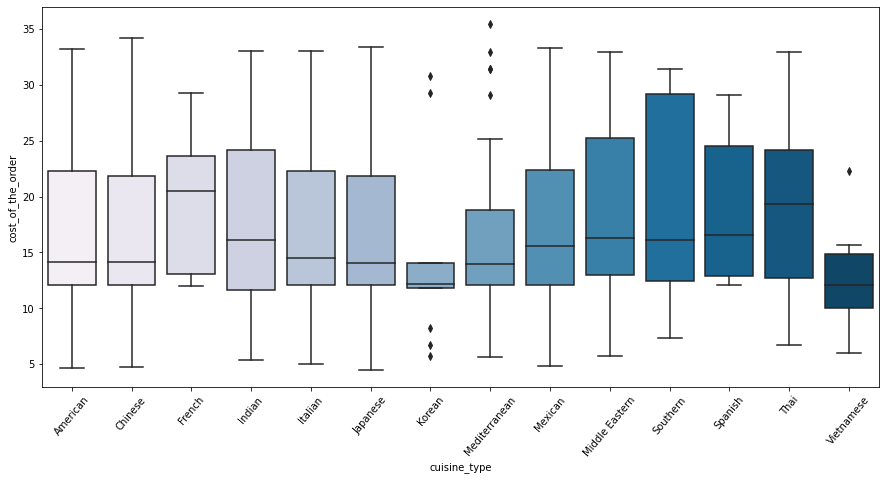

In [47]:
plt.figure(figsize=(15,7))
sns.boxplot(x= 'cuisine_type', y= 'cost_of_the_order', data=data1, palette= 'PuBu')
plt.xticks(rotation= 50)
plt.show()

Obeservation#12.1: The mediterranean cusine type has the most expensive item in the menu, its menu seems to have many outliers in term of price. The most expensive item is above 35 dollars and it is in the mediterranean restaurant cuisine type.

In [48]:
#How the type of cuisine relates to the food preparation time

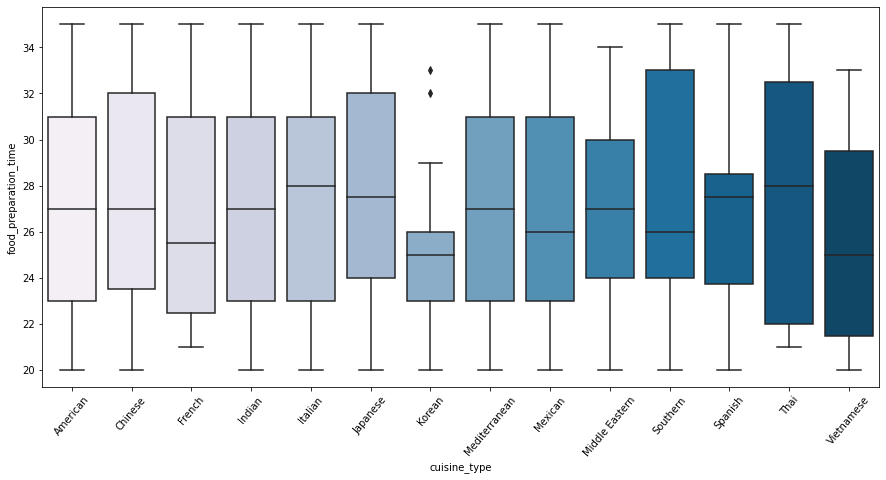

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(x= 'cuisine_type', y= 'food_preparation_time', data=data1, palette= 'PuBu')
plt.xticks(rotation= 50)
plt.show()

Observation#12.2: Most cuisine type seem to be taking about 35 minutes to be prepared. the average between every cuisine type preparation time vary. The amelioration of these times could also improve the customer service.

In [50]:
#Lets find out the relationship between the day of the week and delivery time

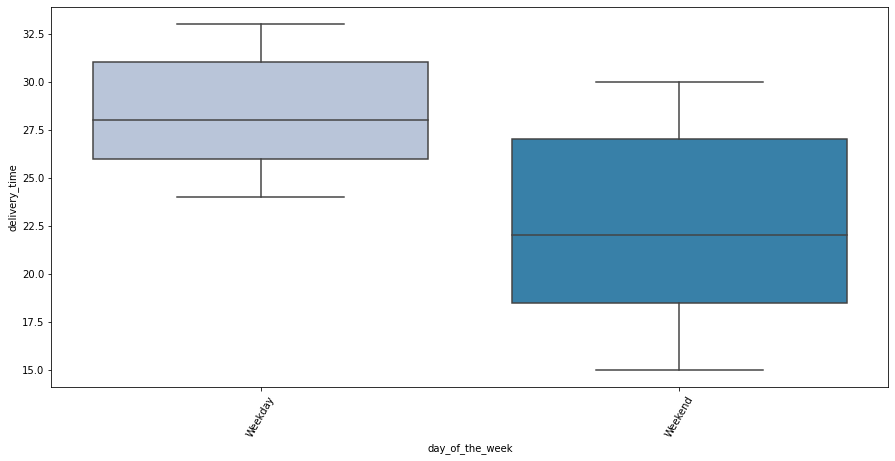

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(x= 'day_of_the_week', y= 'delivery_time', data=data1, palette= 'PuBu')
plt.xticks(rotation=60)
plt.show()

Observation#12.3: The delivery takes longer during weekday than weekend. this could be due to the week day traffic.

In [52]:
#Lets find the revenue made by each restaurant

In [53]:
data1.groupby(["restaurant_name"])["cost_of_the_order"].sum().sort_values(ascending = False)

restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 178, dtype: float64

Observation#12.4: Shake shack makes the most revenue out of all the restaurants. Shake shack, The Meatball shop, Blue Ribbon Sushi, Blue ribbon Fried Chicken, and Parm Are the top restaurants in term of revenue. Market table, Wa Jeal, Cipriani Le Specialita, Big wong Restaurant, and Hunan Manor are the restaurants that make the least and should consider big changes to boost their sales.

Rating vs Delivery time

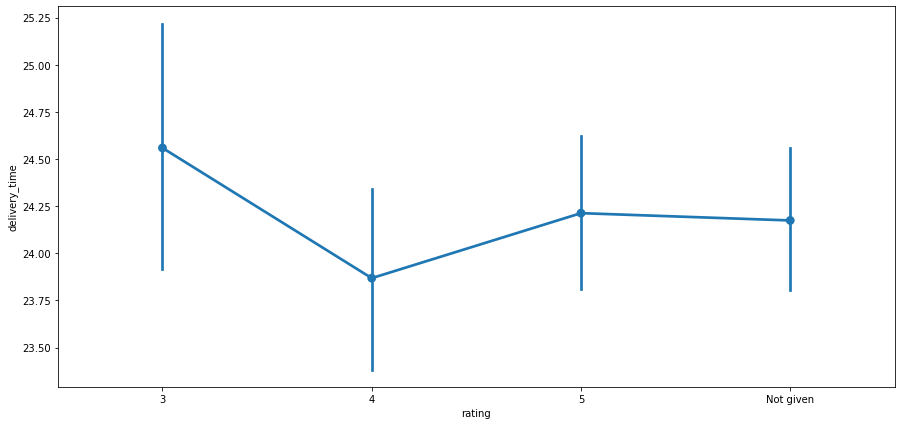

In [54]:
plt.figure(figsize=(15,7))
sns.pointplot(x= "rating", y= "delivery_time", data= data1)
plt.show()

Observation#12.5: Customers give better ratings when the food is delivered under 25 minutes. A larger number of customers seems to not care when the food arrives within 25 minutes.

Rating vs Cost of the order

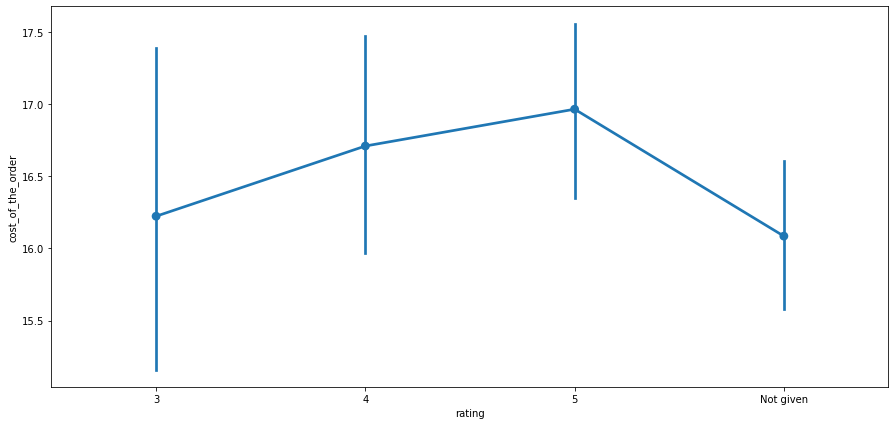

In [55]:
plt.figure(figsize=(15, 7))
sns.pointplot(x= 'rating', y="cost_of_the_order", data=data1)
plt.show()

Observation#12.6: Customers rating seems to be higher with the price. The relation between rating and pricing should not really matter if the service is fast and reliable.

Correlation among variables

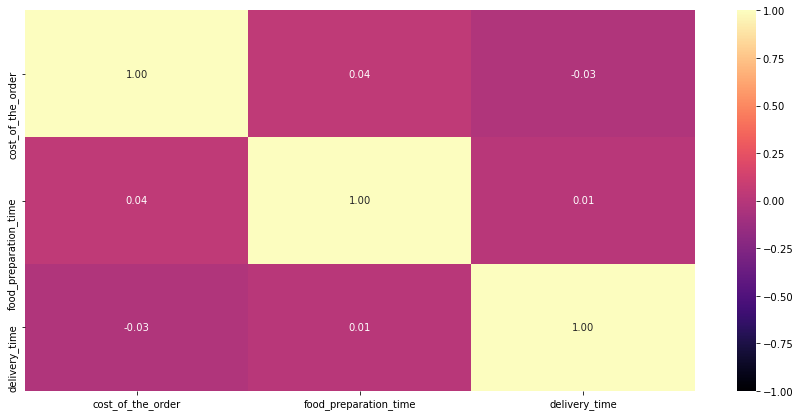

In [56]:
#Heatmap
corr = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15,7))
sns.heatmap(data1[corr].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='magma')
plt.show()

Observation#12.7: There is a small negative correlation between cost of order and delivery time. As one increase the other should slightly decrease.

Question 13

In [57]:
data1_rated = data1[data1['rating'] != 'Not given'].copy()

In [58]:
data1_rated['rating'] = data1_rated.rating.astype('str').astype("int")

In [59]:
data1_rating_count = data1_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
data1_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [60]:
rest_names = data1_rating_count[data1_rating_count['rating']>50]['restaurant_name']

In [61]:
data1_mean4 = data1_rated[data1_rated['restaurant_name'].isin(rest_names)]

In [62]:
data1_mean4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending= False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


Observation#13: The advertisement project will only concern 4 restaurants. The advertisement project should be extend and not be given on rating bases, the restaurants that have the least ratings should be advised on their services and be given a positive advertisement campain.

Question 14

In [63]:
#Lets set a function to determine the revenue and compute the column Revenue
def compute_revenue(x):
    if x > 20:
        return x*0.25
    elif x>5:
        return x*0.15
    else:
        return x*0
data1['Revenue'] = data1['cost_of_the_order'].apply(compute_revenue)

In [64]:
data1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [65]:
#Lets get the total Revenue
total_revenue = data1['Revenue'].sum()
print('The revenue is around', round(total_revenue, 2), 'dollars')

The revenue is around 6166.3 dollars


In [66]:
data1.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,Revenue
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,3.248842
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,2.295598
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,0.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,1.812000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,2.121000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,5.574375
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,8.852500


Observation#14: The total revenue made by the Foodhub is 6166.3 dollars. The average revenue is 3.24 dollars.the maximum revenue made is 8.85 dollars.

Question 15

In [67]:
#Lets calculate total delivery time and add a new column to the data frame for it
data1['total_time'] = data1['food_preparation_time'] + data1['delivery_time']

In [68]:
data1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [69]:
data1_time_greater_than_60 = data1[data1['total_time']>60]
print('the number of total orders that take 60 minutes total to deliver is:', data1_time_greater_than_60 .shape[0])

the number of total orders that take 60 minutes total to deliver is: 200


In [70]:
percentage_time = (data1_time_greater_than_60.shape[0] / data1.shape[0])*100
print('percentage of orders that take 60 minutes in total delivery time:', round(percentage_time, 2), '%')

percentage of orders that take 60 minutes in total delivery time: 10.54 %


Observation#15: 200 orders take 60 minutes to be delivered, which is 10.54% of the total order.

Question 16

In [71]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
 9   Revenue                1898 non-null   float64 
 10  total_time             1898 non-null   int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 119.6 KB


In [72]:
#The mean delivery time on weekdays

print('The mean delivery time on weekdays is around', 
      round(data1[data1['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [73]:
#The mean delivery time on weekends
print('The mean delivery time on weekends is around', 
      round(data1[data1['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekends is around 22 minutes


Observation#16: The average delivery time on the weekend is 6 minutes less than the average on weekdays. this is due to the high traffic during weekdays.

Conclusion and Recommendations:
The restaurants that have high counts of orders, 
have the cuisine type the customers want and 
they also have a good average of cost for the 
order, they also have a good average when it comes
to the food preparation time. These restaurants have 
a moderate to good sales, but they could be improved,
by the advertisement and discounts. Discounts and 
advertisements could attract more customers as well as
making the existing customers feel more welcome and appreciated.
The restaurants That struggling with their sales could 
improve their menus, do some price adjustments to lower 
some of their pricing to attract customers. They could 
also get faster delivery personnel and faster people in their kitchens;
this could lower the food preparation and delivery time.
With these chances the orders and sales numbers could see some improvements.
Also conducting more advertisements could attract more customers and the 
improvements in the service quality would make them stick around, 
which will increase the sales.
